In [186]:
### **Phase 1 — Data Preparation**
#TODO:
##1. Load the dataset into a DataFrame. -> done
##2. Inspect the data’s shape, column names, and missing values. -> done
##3. Clean the data:
##   - Remove irrelevant or empty rows and columns. ->done
##   - Convert `DataValue` and other numeric fields into proper numerical types.
##   - Rename or simplify columns for clarity. -->done

In [187]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [194]:
import os
print(os.getcwd())          # shows your current working directory
print(os.listdir("../data"))  # lists files inside the data folder

pd.read_csv("../data/U.S._Chronic_Disease_Indicators.csv")

FileNotFoundError: [Errno 2] No such file or directory

In [195]:
df.head() #

,YearStart,YearEnd,LocationAbbr,LocationDesc,DataSource,Topic,Question,Response,DataValueUnit,DataValueType,...,TopicID,QuestionID,ResponseID,DataValueTypeID,StratificationCategoryID1,StratificationID1,StratificationCategoryID2,StratificationID2,StratificationCategoryID3,StratificationID3
0,2020,2020,US,United States,BRFSS,Health Status,Recent activity limitation among adults,NaN,Number,Age-adjusted Mean,...,HEA,HEA04,NaN,AGEADJMEAN,SEX,SEXF,NaN,NaN,NaN,NaN
1,2015,2019,AR,Arkansas,US Cancer DVT,Cancer,"Invasive cancer (all sites combined), incidence",NaN,Number,Number,...,CAN,CAN07,NaN,NMBR,SEX,SEXM,NaN,NaN,NaN,NaN
2,2015,2019,CA,California,US Cancer DVT,Cancer,"Cervical cancer mortality among all females, u...",NaN,Number,Number,...,CAN,CAN03,NaN,NMBR,OVERALL,OVR,NaN,NaN,NaN,NaN
3,2015,2019,CO,Colorado,US Cancer DVT,Cancer,"Invasive cancer (all sites combined), incidence",NaN,Number,Number,...,CAN,CAN07,NaN,NMBR,RACE,HIS,NaN,NaN,NaN,NaN
4,2015,2019,GA,Georgia,US Cancer DVT,Cancer,"Prostate cancer mortality among all males, und...",NaN,Number,Number,...,CAN,CAN05,NaN,NMBR,RACE,WHT,NaN,NaN,NaN,NaN


In [196]:
df.tail(3)

,YearStart,YearEnd,LocationAbbr,LocationDesc,DataSource,Topic,Question,Response,DataValueUnit,DataValueType,...,TopicID,QuestionID,ResponseID,DataValueTypeID,StratificationCategoryID1,StratificationID1,StratificationCategoryID2,StratificationID2,StratificationCategoryID3,StratificationID3
309212,2022,2022,WI,Wisconsin,BRFSS,Immunization,Pneumococcal vaccination among adults aged 65 ...,NaN,%,Crude Prevalence,...,IMM,IMM04,NaN,CRDPREV,RACE,BLK,NaN,NaN,NaN,NaN
309213,2022,2022,VT,Vermont,BRFSS,Social Determinants of Health,Lack of health insurance among adults aged 18-...,NaN,%,Crude Prevalence,...,SDOH,SDH09,NaN,CRDPREV,RACE,HAPI,NaN,NaN,NaN,NaN
309214,2022,2022,WA,Washington,BRFSS,Alcohol,Binge drinking prevalence among adults,NaN,%,Age-adjusted Prevalence,...,ALC,ALC06,NaN,AGEADJPREV,SEX,SEXM,NaN,NaN,NaN,NaN


In [197]:
missing_values = df.isnull().sum() #check for missing values per columns

In [198]:
missing_values

YearStart                         0
YearEnd                           0
LocationAbbr                      0
LocationDesc                      0
DataSource                        0
Topic                             0
Question                          0
Response                     309215
DataValueUnit                     0
DataValueType                     0
DataValue                    100019
DataValueAlt                 100019
DataValueFootnoteSymbol      207499
DataValueFootnote            207499
LowConfidenceLimit           120330
HighConfidenceLimit          120325
StratificationCategory1           0
Stratification1                   0
StratificationCategory2      309215
Stratification2              309215
StratificationCategory3      309215
Stratification3              309215
Geolocation                    5763
LocationID                        0
TopicID                           0
QuestionID                        0
ResponseID                   309215
DataValueTypeID             

In [199]:
## COLUMNS ##
#yearstart
#yearend
#locationAbbr //US
#locationDec //United State
#Topic // dissease reason
#question  // that we can get out of every dissease
#stratificationCategory1 // gender
#stratificatio1 gender and etnicity


In [200]:
#eremove columns that wont be need it
remove_columns = df[["YearStart",
               "YearEnd",
               "LocationAbbr",
               "LocationDesc",
               "Topic",
               "Stratification1",
               "DataValue"

               ]]

In [201]:
remove_columns.head(1) # check remove columns

,YearStart,YearEnd,LocationAbbr,LocationDesc,Topic,Stratification1,DataValue
0,2020,2020,US,United States,Health Status,Female,2.9


In [202]:
#TODO: rename columns
#change LocationAbbr -> accronyms
#chnage LocationDesc -> county
#change Topic -> Cause
#change Stratification1 -> gender


In [203]:
#change old column new with new column names
final_df = remove_columns.rename(columns = {
    "YearStart": "start",
    "YearEnd": "end",
    "LocationAbbr": "accronyms",
    "LocationDesc": "country",
    "Topic": "cause",
    "Stratification1": "etnicity/gender",
    "DataValue": "data value"

})

In [204]:
final_df.head(1)

,start,end,accronyms,country,cause,etnicity/gender,data value
0,2020,2020,US,United States,Health Status,Female,2.9


In [205]:
#total causes and nu
print(final_df["cause"].value_counts().sort_values(ascending=False))
print(final_df["data value"].mean())


cause
Cardiovascular Disease                             30709
Chronic Obstructive Pulmonary Disease              26951
Nutrition, Physical Activity, and Weight Status    26069
Health Status                                      25612
Alcohol                                            25321
Cancer                                             22358
Immunization                                       19140
Social Determinants of Health                      19026
Arthritis                                          18645
Diabetes                                           17318
Mental Health                                      16976
Tobacco                                            15931
Oral Health                                        13236
Asthma                                             10511
Cognitive Health and Caregiving                     9904
Sleep                                               5318
Disability                                          5060
Maternal Health          

In [206]:
##phase 2
#TODO:
#which health casue appear the most?
#use a barchart to compare them
#access to data value and compare them
#visualize with a barchart

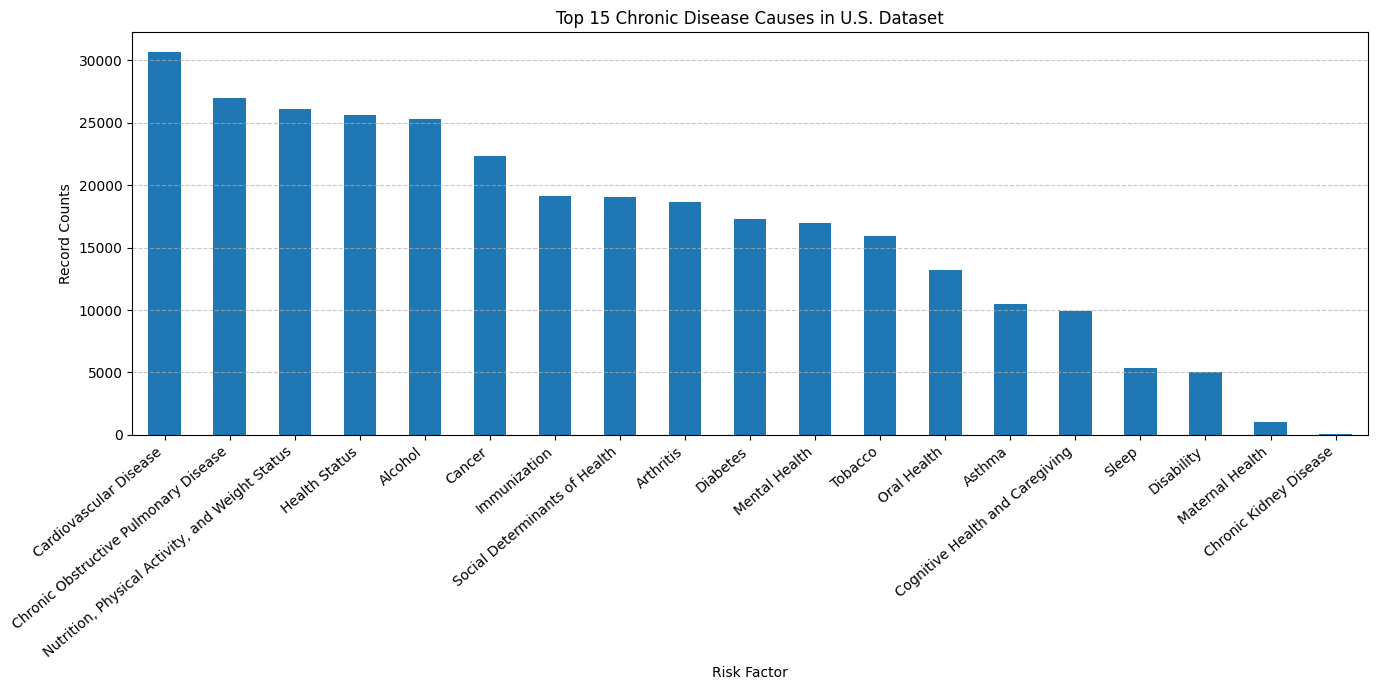

In [207]:
counts = final_df["cause"].value_counts().sort_values(ascending=False)

plt.figure(figsize = (14, 7))
plt.style.use("default")
counts.plot(kind="bar")
plt.title("Top 15 Chronic Disease Causes in U.S. Dataset")
plt.xlabel("Risk Factor")
plt.ylabel("Record Counts")
plt.xticks(rotation = 40, ha="right")
plt.grid(axis="y", linestyle="--", alpha=0.7) #LINES
plt.tight_layout()
plt.show()